count= 770
77.0 %


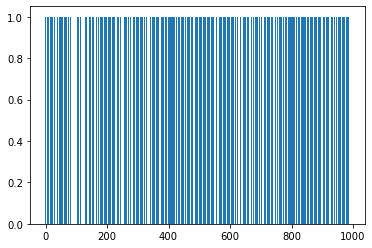

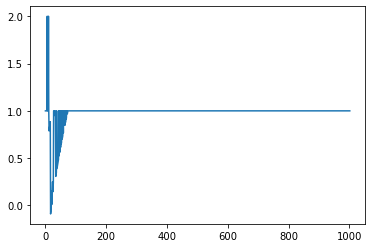

Fin


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy
import math
from random import randint

def Exp(N,expN):
    if N>10:
        pi=2*N**0.5/math.log(N)
        r=randint(5,N)
        if r==N:
            r=N-2
        s=N-r
        if r<=10:
            er=expN[r]    
        else:
            expN[N]=min(pi-expN[r]-expN[s],expN[N])
        if s<=10:
            es=expN[s]
        else:
            expN[N]=min(pi-expN[r]-expN[s],expN[N])
        return expN[N],expN
    else:
        return expN[N],expN

n_iter=10
Nmax=1000
primes=list(sympy.primerange(2,Nmax+1))
prime_train=[2,3,5,7]
expN=[1]*(Nmax+2)
expN[2]=1
expN[3]=1
expN[4]=1
expN[5]=1
expN[6]=2
expN[7]=1
expN[8]=1
expN[9]=1
expN[10]=2

PrimeTrue=[]
PrimeCheck=[]
for n in range(10,Nmax+1):
    BOOL=True
    if n in primes:
        PrimeTrue.append(1)
    else:
        PrimeTrue.append(0)
    pi=2*n**0.5/math.log(n)
    
    for m in range(n_iter):
        r=randint(5,n)
        if r==n:
            r=n-2
        s=n-r
        g=math.gcd(s,r)
        if g!=1:
            PrimeCheck.append(0)
            break
        else:
            if m==0:
                ermax,expN=Exp(r,expN)
                esmax,expN=Exp(s,expN)
            else:
                er,expN=Exp(r,expN)
                es,expN=Exp(s,expN)
                ermax=max(er,ermax)
                esmax=max(es,esmax)
            prob=(ermax+esmax)/pi
    if prob >0.5:
        PrimeCheck.append(1)
    else:
        PrimeCheck.append(0)

x=[]
Hit=[]
count=0
for n in range(Nmax-10):
    C=PrimeCheck[n]
    T=PrimeTrue[n]
    if C==T:
        count+=1
        x.append(n)
        Hit.append(1)
    else:
        x.append(n)
        Hit.append(0)

print('count=',count)
print(round(count/Nmax*100,2),'%')

plt.bar(x,Hit)
plt.show()
plt.plot(expN)
plt.show()
print('Fin')